In [4]:
import sys 
sys.path.append('..\..')

import matplotlib.pyplot as plt
import torch
from models import SoftmaxWeight, LocationScaleFlow, DIFDensityEstimator
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


number of training samples 1797


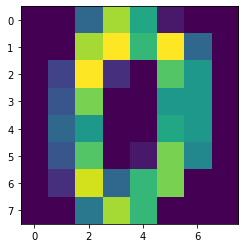

In [6]:
###DIGITS###

from sklearn.datasets import load_digits
digits = load_digits()
extracted = digits.data
plt.imshow(digits.images[0])
target_samples = torch.tensor(extracted).float()
target_samples = (target_samples)/16
p = target_samples.shape[1]
num_samples = target_samples.shape[0]

print("number of training samples "  +str(num_samples))

In [7]:
K = 20
weight = SoftmaxWeight(K, p, [10,10,10])
dif = DIFDensityEstimator(target_samples, K)
dif.w = weight
loss_values = dif.train(1000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.97it/s, loss = -53.972996]


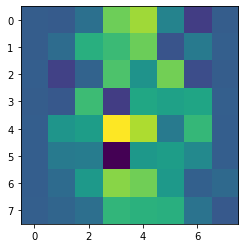

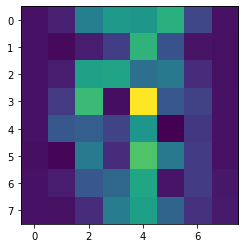

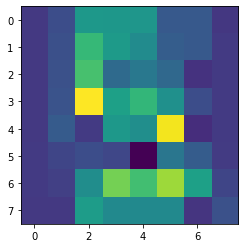

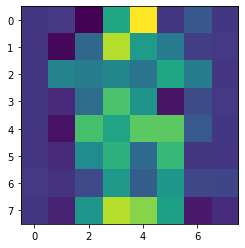

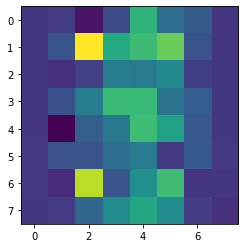

In [8]:
for _ in range(5):
    plt.figure()
    plt.imshow(dif.sample_model(1).cpu().detach().reshape(8,8))